# 15-Industrial Hygiene

Learning Objectives:
1. Learn the four steps of industrial hygiene
2. Evaluate the magnitude of exposures and responses
    - Vapors
    - Dusts
    - Noise
    - Thermal radiation


## Industrial Hygiene

Industrial hygienists are typically part of the safety and health team in a company. They are responsible for identifying, evaluating, and controlling workplace hazards together with workers and management. 

Picture of Industrial Hygienist in Chemical Plant

<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/hygienist.jpeg?raw=true" width="400">

[https://images.app.goo.gl/EmTPJxCdSidwUoXQ6](https://images.app.goo.gl/EmTPJxCdSidwUoXQ6)

The four steps of industrial hygiene are:

1. **Anticipation**: Identifying potential hazards before they occur.
2. **Recognition**: Identifying hazards that are present.
3. **Evaluation**: Determining the magnitude of the exposure and the response.
4. **Control**: Implementing measures to control the hazards.

### Common Tools used by Industrial Hygienists

<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/htools.png?raw=true" width="600">


```{note}
The EH&S department together with Industrial Hygienists work to keep everyone safe. The safety team utilizes Process Safety Management (PSM) to identify and control hazards as we discussed in the previous lectures. However, it is important to remember that safety is everyone's responsibility. Some facilities have thousands of employees and only a few industrial hygienists. It is important to take responsibility for your own safety and work with the safety team.
```

## Quantifying Exposures

TWA, time-weighted average, is the most common way to quantify exposures. It is the exposure averaged over an 8-hour workday.

### Gases and Vapors

```{note}
Even if the exposure is longer than 8 hours, the TWA is still calculated over an 8-hour workday. For example, if a worker is exposed to a chemical for 12 hours, the TWA is calculated over 8 hours.
```

$$

\text{TWA} = \frac{\sum_{i=1}^{n} C_i \cdot T_i}{8} = \frac{1}{8} \int_{0}^{8} C(t) dt

$$

where $C_i$ is the concentration of the chemical at time $i$ and $T_i$ is the time the concentration is present. 

### Example Concentration Profile
| Time (hours) | Concentration (ppm) |
|--------------|---------------------|
| 0            | 0                   |
| 1            | 10                  |
| 2            | 15                  |
| 5            | 18                  |
| 6            | 20                  |
| 8            | 10                  |
| 9            | 30                  |
| 10           | 40                  |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

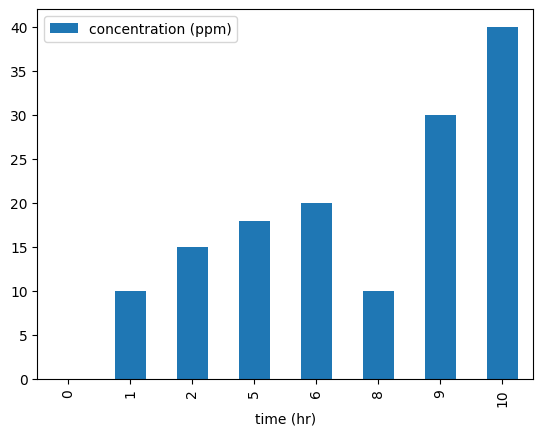

In [2]:
#example discrete concentration profile
data = {'time (hr)': [0, 1, 2, 5, 6, 8, 9, 10],
        'concentration (ppm)': [0,10,15,18,20,10,30,40]}
df = pd.DataFrame(data)
df.plot(x='time (hr)', y='concentration (ppm)', kind = 'bar')
plt.show()

In [3]:
#TWA Calculation; Method 1 (assume the current measure is the same for the previous interval)
TWA_1 = 0; ti_1 = 0;
#loop through each time interval
for i in range(1, len(df)):
    #calculate TWA for each interval
    C_i = df['concentration (ppm)'][i]
    t_i = df['time (hr)'][i]
    TWA_1 += C_i*(t_i-ti_1)
    ti_1 = t_i; 
print(f'TWA_1 = {TWA_1/8:.1f} ppm')

TWA_1 = 23.6 ppm


In [4]:
#TWA Calculation; Method 2 (use the trapezoidal rule)
TWA_trap = 0;
#loop through each time interval
for i in range(1, len(df)):
    #calculate TWA for each interval
    C_i = df['concentration (ppm)'][i]
    C_i_1 = df['concentration (ppm)'][i-1]
    t_i = df['time (hr)'][i]
    t_i_1 = df['time (hr)'][i-1]
    TWA_trap += (C_i+C_i_1)*(t_i-t_i_1)/2
print(f'TWA_trap = {TWA_trap/8:.1f} ppm')

TWA_trap = 21.4 ppm


In [5]:
#TWA Calculation; Method 3 (fit a polynomial to the data and integrate with cspline1d_integral)
from scipy.interpolate import CubicSpline
#fit a polynomial to the data
cs = CubicSpline(df['time (hr)'], df['concentration (ppm)'])
#integrate the polynomial with quad
from scipy.integrate import quad
TWA_CSpline, err = quad(cs, 0, 10)
print(f'TWA_CSpline = {TWA_CSpline/8:.1f} ppm')

TWA_CSpline = 21.1 ppm


In [6]:
#fit a polynomial to the data
p = np.polyfit(df['time (hr)'], df['concentration (ppm)'], 3)
#integrate the polynomial
TWA_poly = quad(np.poly1d(p), 0, 10)[0]
print(f'TWA_poly = {TWA_poly/8:.1f} ppm')

TWA_poly = 22.1 ppm


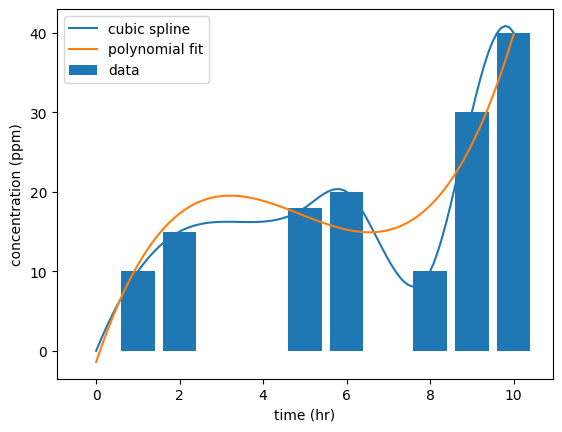

In [7]:
#plot the data and the polynomial fit
t = np.linspace(0, 10, 100)
C = np.poly1d(p)(t)
plt.plot(t, cs(t), label='cubic spline')
plt.plot(t, C, label = 'polynomial fit')
plt.bar(df['time (hr)'], df['concentration (ppm)'], label = 'data')
plt.xlabel('time (hr)')
plt.ylabel('concentration (ppm)')
plt.legend()
plt.show()

In [8]:
#tabular display of the results
print('Method\tTWA (ppm)')
print(f'1\t\t{TWA_1/8:.1f}')
print(f'trapezoid\t{TWA_trap/8:.1f}')
print(f'CSpline\t\t{TWA_CSpline/8:.1f}')
print(f'Polynomial_3\t{TWA_poly/8:.1f}')

Method	TWA (ppm)
1		23.6
trapezoid	21.4
CSpline		21.1
Polynomial_3	22.1


#### Was the worker over exposed?

If the TLV-TWA is 20 ppm for the above chemical, then YES, the worker was over exposed.

:::{admonition} Consequences of Overexposure
:class: warning
Overexposure to chemicals can cause a variety of health effects. Some chemicals can cause immediate effects such as dizziness, nausea, and headaches. Others can cause long-term effects such as cancer, reproductive issues, and organ damage. 

In order to prevent this scenario from happening again, the industrial hygienist would work with the safety team to implement control measures such as increased ventilation and the use of a respirator with a organic vapor cartridge for example. 
- Using a respiratory for long periods of time is not ideal

<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/resp.png?raw=true" width="300">

:::

### Multiple Gaseous Chemicals

What if there are multiple hazardous vapors present?

Overexposure can be determined by the below equation:

$$
\sum_{i=1}^{n} \frac{C_i}{\text{TLV-TWA}_i} > 1?
$$

The TLV-TWA for gaseous mixtures can be found by:

$$
\text{TLV-TWA}_{\text{mixture}} =  \frac{\sum_{i=1}^{n} C_i}{\sum_{i=1}^{n} \frac{C_i}{\text{TLV-TWA}_i}}
$$

```{note}
Once the mixture TLV-TWA is found, determining the exposure can be done using the same equation as before where the sum of the concentrations for each timeframe is summed and divided by 8 hours.
```

### Dusts

Dusts are treated the same way but instead of using ppm, mg/m^3 is used.

### Noise

Sound pressure level (SPL) is used as an intensity measure. The lowest SPL that can be heard by the human ear is near 2E-5 Pa. Thus in the below equation $I_o$ is 2E-5 Pa.

$$
\text{dB} = 10 \log_{10} \left( \frac{I}{I_o} \right)
$$

where $P$ is the sound pressure and $I$ is the intensity.

See "Permissible Noise Exposures," [https://www.osha.gov/laws-regs/regulations/standardnumber/1910/1910.95] (https://www.osha.gov/laws-regs/regulations/standardnumber/1910/1910.95) where you can use the combination rule of $\sum \frac{D_i}{\text{MTA}_i}>1?$ to determine if the worker is overexposed, where $D_i$ is the duration at the given dB sound level and MTA is the maximum time allowed at that level.

### Thermal Radiation 

Flames, hot metal surfaces, and other heat sources can cause burns. The heat flux is the amount of heat energy transferred per unit area per unit time. The heat flux is measured in W/m^2.

<img src="https://github.com/clint-bg/safetyinjc/blob/main/physical/supportfiles/degrees.png?raw=true" width="600">


[Image Reference](https://commons.wikimedia.org/wiki/File:1st,_2nd,_and_3rd_degree_burns.jpg)

From Handbook of Chemical Hazards Analysis Procedures (1989), Table 4.2

Heat Radiation Intensity (kW/m^2) |Time for pain (seconds)| Time for 2nd Degree Burn (seconds)
------------------|----------------|-----------------------------------
1                 |115              | 663
2                 |45              | 187
3                 |27              | 92
4                 |18              | 57
5                 |13              | 40
6                 |11              | 30
8                 |7              | 20
10                |5              | 14
12                |4              | 11

[Reference Link](https://nepis.epa.gov/Exe/ZyNET.exe/10003MK5.txt?ZyActionD=ZyDocument&Client=EPA&Index=1986%20Thru%201990&Docs=&Query=%28radiation%29%20OR%20FNAME%3D%2210003MK5.txt%22%20AND%20FNAME%3D%2210003MK5.txt%22&Time=&EndTime=&SearchMethod=1&TocRestrict=n&Toc=&TocEntry=&QField=&QFieldYear=&QFieldMonth=&QFieldDay=&UseQField=&IntQFieldOp=0&ExtQFieldOp=0&XmlQuery=&File=D%3A%5CZYFILES%5CINDEX%20DATA%5C86THRU90%5CTXT%5C00000003%5C10003MK5.txt&User=ANONYMOUS&Password=anonymous&SortMethod=h%7C-&MaximumDocuments=1&FuzzyDegree=0&ImageQuality=r75g8/r75g8/x150y150g16/i425&Display=hpfr&DefSeekPage=x&SearchBack=ZyActionL&Back=ZyActionS&BackDesc=Results%20page&MaximumPages=1&ZyEntry=73)

You may have to click the 'reference link' twice to get it to work.

:::{admonition} Initial Source
:class: note
The initial source of the above table is Buettner, K, "Effects of Extreme Heat and Cold on Human Skin, II Surface Temperatures, Pain and Heat Conductivity in Experiments with Radiant Heat," Journal of Applied Physiology, 1951, 3, 703.
:::

In [9]:
data = {'Radiation (kW/m2)':[1,2,3,4,5,6,8,10,12], 
        'Pain time (sec)':[115,45,27,18,13,11,7,5,4], 
        '2nd Degree Time (sec)':[663, 187,92,57,40,30,20,14,11]}
df = pd.DataFrame(data)

[DESR 6055.09](https://www.denix.osd.mil/ddes/denix-files/sites/32/2021/08/DESR-6055.09-Edition1.pdf) is the handbook for the Department of Defense and gives the following relationship for heat flux (q, kW/m2) and time,t, before a 2nd degree burn:

$$
t = 200 \cdot q^{-1.46}
$$

In [10]:
#Causitive variable from Probit correlations from death from burning
time = np.linspace(5, 700, 1000)
def Q2(t):
    return (t/200)**(-1/1.46)

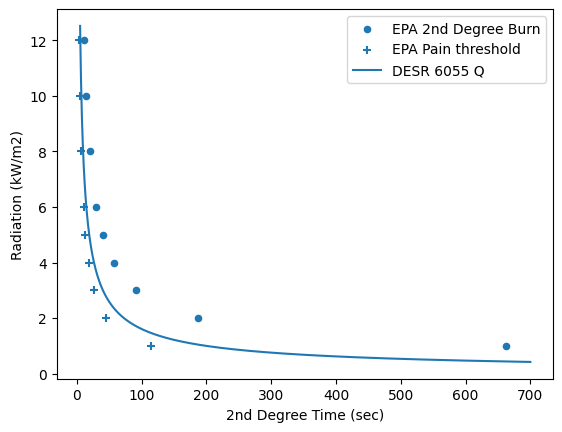

In [11]:
df.plot(x='2nd Degree Time (sec)', y='Radiation (kW/m2)', kind = 'scatter', label='EPA 2nd Degree Burn')
plt.scatter(df['Pain time (sec)'], df['Radiation (kW/m2)'], marker = '+', label = 'EPA Pain threshold')
plt.plot(time, Q2(time), label = 'DESR 6055 Q')
plt.legend()

In [12]:
200/60

3.3333333333333335

The above plot shows that the relationship used for the military (DESR 6055) is conservative relative to the EPA's Handbook of Chemical Hazards Analysis Procedures. Considert that in full sun, the approximate radiation is 1 kW/m2. Would it really take 660 seconds (11 minutes) to get a sunburn that blisters? No, it would take longer indicating that both relationships are conservative.

#### Estimating thermal flux from a fire

The radiation from a fire or fireball descreases with the square of the distance from the fire. The heat flux is given by:

$$
q = \frac{P}{4 \pi r^2}
$$

where $P$ is the power of the fire in watts and $r$ is the distance from the fire in meters.

Thus, if a fire has a power of 1 MW and you are 10 meters away, the heat flux is:

'Your answer here'

How long would you have before a 2nd degree burn?